<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise_10_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 2- Same as task 1, but with Bayesian linear regression
(sklearn.linear_model.BayesianRidge()), binary outcome can be encoded as +1 and -1. You will have to convert the continuous prediction back to binary (threshold it at zero) to calculate the test accuracy.

In [ ]:
%%capture
!pip install nilearn

In [ ]:
%%capture
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib

In [ ]:
%%capture
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score

In [ ]:
%%capture
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
# We import the data first in order to select the last 10 subjects
%%capture
brain_data = datasets.fetch_oasis_vbm(n_subjects=(100))
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=(100)) # We fix this at 100
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females and 0 for males

In [ ]:
# We prepare the X matrix and y vector, and we scale X
X, y = input_variables[:, 0:50], output_variable
X_scaled = scaler.fit_transform(X)
y_cont = np.where(y == 0, -1,y)

In [ ]:
# We create the train-test splits by hand
X_scaled_train = X_scaled[0:90,:]
X_scaled_test = X_scaled[90:100,:]
y_train = y[0:90]
y_test  = y[90:100]

y_cont_train = y_cont[0:90]
y_cont_test = y_cont[90:100] 

In [ ]:
# We preallocate the variables where we will store the results
b_ridge_tr_acc = []
b_ridge_test_acc = []

In [ ]:
# We are ready to iterate through the degree values:
for d in list(range(1,4)):

  X_scaled_train = X_scaled[0:90,:]           # We re-instate X_scaled_train so that the initial value is always the same at the start of every iteration
  X_scaled_test = X_scaled[90:100,:]        # Ditto for X_scaled_test

  poly = PolynomialFeatures(degree=(d))                                 # We define the PolynomialFeatures model
  X_scaled_train = poly.fit_transform(X_scaled_train)         # We fit_transform the training data to a n-th degree polynomial 
  X_scaled_test = poly.fit_transform(X_scaled_test)             # Ditto for the test data

# We fit the logreg model on the transformed data to obtain training accuracies
  b_ridge = BayesianRidge().fit(X_scaled_train, y_cont_train)    # We define the Bayesian Ridge model
  b_ridgeTrain = b_ridge.predict(X_scaled_train)                          # We use the fitted model to obtain prediction values on the training data
  b_ridgeTrain  = np.where(b_ridgeTrain>0, 1, 0)                          # We re-binarize the prediction values on the training data
  score1 = accuracy_score(y_train, b_ridgeTrain)                          # We calculate the accuracy between the true labels and the re-binarized predictions
  score1 = np.multiply(score1, 100)                                                  # We multiply the scores by 100 to get them in percentage form
  b_ridge_tr_acc.append(score1)                                                       # We store the scores

# We use the .predict method to obtain test accuracies
  b_ridgePred = b_ridge.predict(X_scaled_test)     # We predict X_test based on b_ridge
  b_ridgePred  = np.where(b_ridgePred>0, 1, 0)       # We re-binarize the predictions in order to obtain valid test accuracy scores
  score2 =accuracy_score(y_test, b_ridgePred)       # We calculate the scores
  score2 = np.multiply(score2, 100)                   # We multiply the scores by 100 to get them in percentage form
  b_ridge_test_acc.append(score2)                              # We store the scores

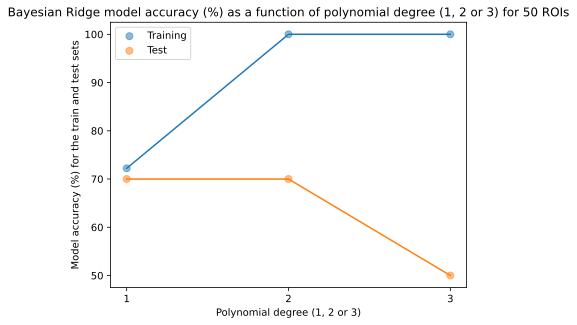

In [ ]:
# We're ready to plot
sample=list(range(1,4))
lab = ['Training', 'Test']
plt.style.use("default")
plt.scatter(sample,b_ridge_tr_acc, s=50, alpha = 0.5, marker = 'o')
plt.scatter(sample,b_ridge_test_acc, s=50, alpha = 0.5, marker = 'o')
plt.legend(labels=(lab))
plt.gca().set(
    title="Bayesian Ridge model accuracy (%) as a function of polynomial degree (1, 2 or 3) for 50 ROIs",
    xlabel="Polynomial degree (1, 2 or 3)",
    ylabel="Model accuracy (%) for the train and test sets",
    xticks = (sample)
)
plt.plot(sample,b_ridge_tr_acc)
plt.plot(sample,b_ridge_test_acc)
plt.show()